# I. Import library

In [651]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

# II. Function to clean training set

In [652]:
def remove_outlier_boxplot(df, feature):
  # compute Q1 & Q3
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  # compute low_fence & up_fence
  IQR = Q3 - Q1
  low_fence = Q1 - 1.5 * IQR
  up_fence = Q3 + 1.5 * IQR
  # remove outliers
  return df[(df[feature] < up_fence) & (df[feature] > low_fence)]

In [653]:
def add_ONE(Xtrain):
  one = np.ones((Xtrain.shape[0], 1))
  return np.concatenate((one, Xtrain), axis = 1)

# II. Gradient descent for LR


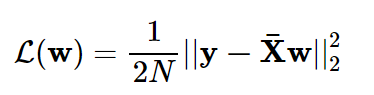

In [654]:
def lossFunction(X, y, w):
  return 0.5 / N * np.linalg.norm(X @ w - y) ** 2

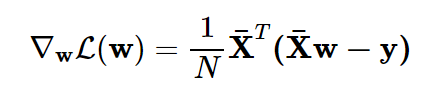

In [655]:
def Gradient(X, y, w):
  return 1/ N * (X.T @ (X @ w - y))

In [656]:
def GD(X, y, w, w_shape, lr= 0.01, iters= 10000):
  w = w.reshape(w_shape, 1)
  loss_full = []
  while iters >= 0: 
    grad = Gradient(X, y, w)
    if np.all(abs(grad) < 1e-3):
      break
    w = w - lr * grad
    if iters > 9000:
      loss_full.append(lossFunction(X, y, w))
    iters -= 1

  return w, loss_full


In [657]:
def predict_normalGD(X, w):
  return X @ w

In [658]:
def MSE(ytest, y_pre_GD, y_pre_SGD):
  from sklearn.metrics import mean_squared_error
  print('MSE:')
  print('Normal Gradient descent: ', mean_squared_error(ytest, y_pre_GD))
  print('Stochastic Gradient descent: ', mean_squared_error(ytest, y_pre_SGD))

In [659]:
def r2_metric(ytest, y_pre_GD, y_pre_SGD):
  from sklearn.metrics import r2_score
  print('r2_square metric:')
  print('Normal Gradient descent: {}%'.format(np.round(r2_score(ytest, y_pre_GD), 2) * 100))
  print('Stochastic Gradient descent: {}%'.format(np.round(r2_score(ytest, y_pre_SGD), 2) * 100))


In [660]:
def lossValue(loss):
  plt.plot(np.arange(1000), loss[:1000], color = 'g')
  plt.title('LOSS_VALUES')
  plt.xlabel('iters')
  plt.ylabel('Loss')
  plt.show()

# III. Apply for dataset

## 1. Dataset fish

###1. Preprocessing data & Create dataset


In [661]:
df = pd.read_csv('fish.csv')

In [662]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [663]:
train, test = train_test_split(df, test_size = 0.3)

In [664]:
features = ['Length1', 'Length2','Length3', 'Height', 'Width', 'Weight']

In [665]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 63 to 138
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  111 non-null    object 
 1   Weight   111 non-null    float64
 2   Length1  111 non-null    float64
 3   Length2  111 non-null    float64
 4   Length3  111 non-null    float64
 5   Height   111 non-null    float64
 6   Width    111 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.9+ KB


In [666]:
for i in range(0, len(features) -1):
  train = remove_outlier_boxplot(train, features[i])

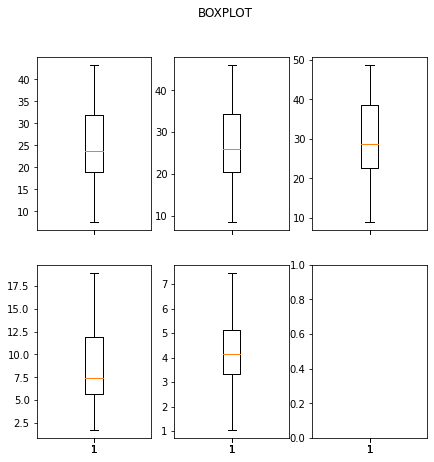

In [667]:
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(7,7))
figure.suptitle('BOXPLOT')
axes[0][0].boxplot(train[features[0]])
axes[0][1].boxplot(train[features[1]])
axes[0][2].boxplot(train[features[2]])
axes[1][0].boxplot(train[features[3]])
axes[1][1].boxplot(train[features[4]]);

Nhận Xét: Các outlier đã bị loại bỏ ra khỏi dataframe

In [668]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 63 to 138
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  106 non-null    object 
 1   Weight   106 non-null    float64
 2   Length1  106 non-null    float64
 3   Length2  106 non-null    float64
 4   Length3  106 non-null    float64
 5   Height   106 non-null    float64
 6   Width    106 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.6+ KB


In [669]:
# training set
Xtrain = train[features[:5]]
ytrain = train[features[-1]]

# test set
Xtest = test[features[:5]]
ytest = test[features[-1]]

In [670]:
print('mean Length1: ', train.Length1.mean())
print('mean Width: ', train.Width.mean())

mean Length1:  24.645283018867925
mean Width:  4.2151084905660365


Data của các columns chênh nhau một lượng tương đối nhiều. Ví dụ Length1 vs width. Việc có sự chênh lệch này có thể gây ảnh hưởng xấu trong mô hình.

Ví dụ: Trọng số của Length1 là a, của width là b. Khi a tăng 1 đơn vị thì kết quả tăng khoảng 25.8, còn làm điều tương tự với b thì kết quả chỉ tăng 4.3.

Mình sẽ thử Standard data để giảm sự chênh lệch này.

In [671]:
for i in range(0, len(features) -1):
  Xtrain[[features[i]]] = standard_scaler.fit_transform(Xtrain[[features[i]]])
  Xtest[[features[i]]] = standard_scaler.fit_transform(Xtest[[features[i]]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

###2. Train model

**Stochastic GD**

In [672]:
Xtrain = np.array(Xtrain).reshape(-1, 5)
Xtest = np.array(Xtest).reshape(-1, 5)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [673]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000000, tol=1e-3))
reg.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [674]:
y_pre_SGD = reg.predict(Xtest)

**Coding from scratch**

In [675]:
Xtrain = add_ONE(Xtrain)
Xtest = add_ONE(Xtest)

In [676]:
Xtrain = np.array(Xtrain).reshape(-1, 6)
Xtest = np.array(Xtest).reshape(-1, 6)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [677]:
# Number of training_example
N = Xtrain.shape[0]

In [678]:
 w = np.arange(Xtrain.shape[1]).reshape(-1, 1) 

In [679]:
print(Xtrain.shape)
print(ytrain.shape)
print(w.shape)

(106, 6)
(106, 1)
(6, 1)


In [680]:
w, loss = GD(Xtrain, ytrain, w, 6)

In [681]:
w

array([[335.95      ],
       [ 99.94865607],
       [ 50.73735342],
       [-69.72235217],
       [ 96.41442164],
       [121.13188615]])

In [682]:
y_pre_GD = predict_normalGD(Xtest, w)

### 3. Evaluate

In [683]:
MSE(ytest, y_pre_GD, y_pre_SGD)

MSE:
Normal Gradient descent:  21396.043249860417
Stochastic Gradient descent:  21602.429687134423


In [684]:
r2_metric(ytest, y_pre_GD, y_pre_SGD)

r2_square metric:
Normal Gradient descent: 80.0%
Stochastic Gradient descent: 79.0%


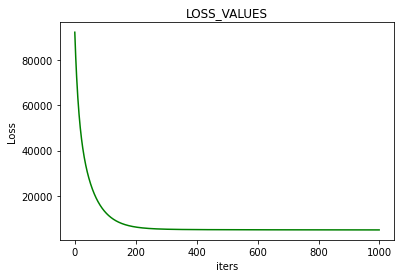

In [685]:
lossValue(loss)

## 2. Dataset insurance

###1. Preprocessing data & Create dataset


In [686]:
df = pd.read_csv('insurance.csv')

In [687]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [688]:
train, test = train_test_split(df, test_size = 0.3)

In [689]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [690]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 327 to 854
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
 6   charges   936 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.5+ KB


In [691]:
def remove_outlier_boxplot(df, feature):
  # compute Q1 & Q3
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  # compute low_fence & up_fence
  IQR = Q3 - Q1
  low_fence = Q1 - 1.5 * IQR
  up_fence = Q3 + 1.5 * IQR
  # remove outliers
  return df[(df[feature] < up_fence) & (df[feature] > low_fence)]

In [692]:
for i in [1, 4, 5]:
  train[features[i]] = label_encoder.fit_transform(train[features[i]])
  test[features[i]] = label_encoder.fit_transform(test[features[i]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [693]:
test

,age,sex,bmi,children,smoker,region,charges
949,25,1,29.700,3,1,3,19933.45800
1223,20,0,24.420,0,1,2,26125.67477
684,33,0,18.500,1,0,3,4766.02200
718,51,0,36.670,2,0,1,10848.13430
677,60,1,31.350,3,1,1,46130.52650
...,...,...,...,...,...,...,...
660,37,1,46.530,3,0,2,6435.62370
316,50,1,32.205,0,0,1,8835.26495
214,45,0,30.900,2,0,3,8520.02600
82,22,1,37.620,1,1,2,37165.16380


In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [695]:
Xtrain = train[features[:6]]
Xtest = test[features[:6]]

# Thấy giá trị của Label quá lớn so với dữ liệu trong tập X. Nên chuẩn hóa nó theo đơn vị nghìn.
ytrain = train[features[-1]] /1000
ytest = test[features[-1]]/1000

In [696]:
Xtrain[['age']] /= max(df.age)
Xtest[['age']] /= max(df.age)

Xtrain[['bmi']] /= max(df.bmi)
Xtest[['bmi']] /= max(df.bmi)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [697]:
Xtrain

,age,sex,bmi,children,smoker,region
327,0.703125,1,0.686618,2,1,1
42,0.640625,1,0.409938,1,0,2
391,0.296875,0,0.704498,0,0,1
615,0.734375,0,0.689441,1,1,2
865,0.625000,1,0.562771,2,0,3
...,...,...,...,...,...,...
928,0.968750,0,0.737060,0,0,2
590,0.906250,0,0.545831,0,0,3
927,0.890625,0,0.378317,1,0,3
1057,0.703125,0,0.598344,0,0,2


###2. Train model

**Stochastic GD**

In [698]:
Xtrain = np.array(Xtrain).reshape(-1, 6)
Xtest = np.array(Xtest).reshape(-1, 6)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [699]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000000, tol=1e-3))
reg.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [700]:
y_pre_SGD = reg.predict(Xtest)

**Coding from scratch**

In [701]:
Xtrain = add_ONE(Xtrain)
Xtest = add_ONE(Xtest)

In [702]:
Xtrain = np.array(Xtrain).reshape(-1, 7)
Xtest = np.array(Xtest).reshape(-1, 7)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [703]:
# Number of training_example
N = Xtrain.shape[0]

In [704]:
 w = np.arange(Xtrain.shape[1]).reshape(-1, 1) 

In [705]:
print(Xtrain.shape)
print(ytrain.shape)
print(w.shape)

(936, 7)
(936, 1)
(7, 1)


In [706]:
w, loss = GD(Xtrain, ytrain, w, 7)

In [707]:
w

array([[-7.40428006],
       [16.46133587],
       [-0.05279379],
       [10.04055474],
       [ 0.58573834],
       [23.14831763],
       [-0.34650212]])

In [708]:
y_pre_GD = predict_normalGD(Xtest, w)

### 3. Evaluate

In [709]:
MSE(ytest, y_pre_GD, y_pre_SGD)

MSE:
Normal Gradient descent:  39.361847719531255
Stochastic Gradient descent:  37.92794227609973


In [710]:
r2_metric(ytest, y_pre_GD, y_pre_SGD)

r2_square metric:
Normal Gradient descent: 76.0%
Stochastic Gradient descent: 77.0%


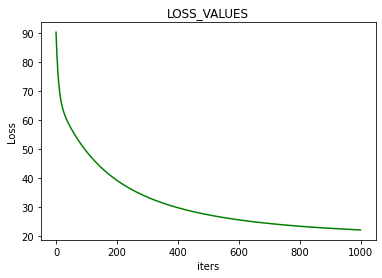

In [711]:
lossValue(loss)

## 3. Dataset wine

###1. Preprocessing data & Create dataset


In [712]:
df = pd.read_csv('wine.csv')

In [713]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [715]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [716]:
for i in [0, 5, 6, 10]:
  df[features[i]] /= max(df[features[i]])

In [717]:
train, test = train_test_split(df, test_size = 0.3)

In [718]:
for count in range(1):
  for i in range(len(features) -1):
    train = remove_outlier_boxplot(train, features[i])

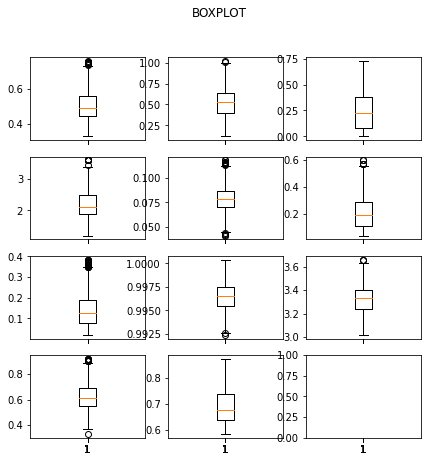

In [719]:
figure, axes = plt.subplots(4, 3, sharex=True, figsize=(7,7))
figure.suptitle('BOXPLOT')
axes[0][0].boxplot(train[features[0]])
axes[0][1].boxplot(train[features[1]])
axes[0][2].boxplot(train[features[2]])
axes[1][0].boxplot(train[features[3]])
axes[1][1].boxplot(train[features[4]])
axes[1][2].boxplot(train[features[5]])
axes[2][0].boxplot(train[features[6]])
axes[2][1].boxplot(train[features[7]])
axes[2][2].boxplot(train[features[8]])
axes[3][0].boxplot(train[features[9]])
axes[3][1].boxplot(train[features[10]]);

In [720]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 875 to 103
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         792 non-null    float64
 1   volatile acidity      792 non-null    float64
 2   citric acid           792 non-null    float64
 3   residual sugar        792 non-null    float64
 4   chlorides             792 non-null    float64
 5   free sulfur dioxide   792 non-null    float64
 6   total sulfur dioxide  792 non-null    float64
 7   density               792 non-null    float64
 8   pH                    792 non-null    float64
 9   sulphates             792 non-null    float64
 10  alcohol               792 non-null    float64
 11  quality               792 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 80.4 KB


In [721]:
# training set
Xtrain = train[features[:11]]
ytrain = train[features[-1]]

# test set
Xtest = test[features[:11]]
ytest = test[features[-1]]

In [722]:
Xtrain.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
875,0.553459,0.31,0.40,2.8,0.109,0.097222,0.055363,0.99614,3.31,0.79,0.791946
1521,0.433962,0.48,0.20,1.9,0.082,0.125000,0.079585,0.99585,3.39,0.43,0.607383
1483,0.509434,0.33,0.44,1.5,0.042,0.083333,0.041522,0.99542,3.35,0.61,0.718121
410,0.566038,0.43,0.34,2.5,0.080,0.361111,0.297578,0.99870,3.38,0.62,0.637584
822,0.421384,0.54,0.13,2.0,0.076,0.208333,0.124567,0.99730,3.61,0.64,0.657718


###2. Train model

**Stochastic GD**

In [723]:
Xtrain = np.array(Xtrain).reshape(-1, 11)
Xtest = np.array(Xtest).reshape(-1, 11)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [724]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000000, tol=1e-3))
reg.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [725]:
y_pre_SGD = reg.predict(Xtest)

**Coding from scratch**

In [726]:
Xtrain = add_ONE(Xtrain)
Xtest = add_ONE(Xtest)

In [727]:
Xtrain = np.array(Xtrain).reshape(-1, 12)
Xtest = np.array(Xtest).reshape(-1, 12)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [728]:
# Number of training_example
N = Xtrain.shape[0]

In [729]:
 w = np.arange(Xtrain.shape[1]).reshape(-1, 1) 

In [730]:
print(Xtrain.shape)
print(ytrain.shape)
print(w.shape)

(792, 12)
(792, 1)
(12, 1)


In [731]:
w, loss = GD(Xtrain, ytrain, w, 12, 0.001, 1000000)

In [732]:
w

array([[-2.53510461],
       [ 0.39757776],
       [-0.99928167],
       [-0.44807235],
       [-0.04966049],
       [ 4.00893954],
       [-0.07496808],
       [-0.39676592],
       [ 5.50140588],
       [-0.58515384],
       [ 1.96273167],
       [ 5.33784346]])

In [733]:
y_pre_GD = predict_normalGD(Xtest, w)

### 3. Evaluate

In [734]:
MSE(ytest, y_pre_GD, y_pre_SGD)

MSE:
Normal Gradient descent:  0.5038416365255809
Stochastic Gradient descent:  0.43411740120407954


In [735]:
r2_metric(ytest, y_pre_GD, y_pre_SGD)

r2_square metric:
Normal Gradient descent: 18.0%
Stochastic Gradient descent: 30.0%


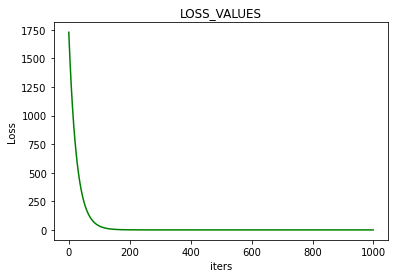

In [736]:
lossValue(loss)

## Dataset weather

###1. Preprocessing data & Create dataset


In [737]:
df = pd.read_csv('weather.csv')

In [738]:
df.head()


,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [739]:
features = ['Humidity', 'Wind_Speed_kmh','Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Rain', 'Description', 'Temperature_c']

In [740]:
onehot_encoder = OneHotEncoder(sparse=False)

In [741]:
df[features[-2]] = onehot_encoder.fit_transform(df[[features[-2]]])

In [742]:
for i in range(5):
  df[features[i]] /= max(df[features[i]])

In [743]:
df.head(3)

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,0.211672,0.362117,0.500,0.977252,0,1.0
1,21.111111,0.73,0.393106,0.919220,1.000,0.972852,1,0.0
2,16.600000,0.97,0.112186,0.537604,0.926,0.969973,1,0.0


In [744]:
train, test = train_test_split(df, test_size = 0.3)

In [745]:
for j in range(2):
  for i in [0, 1, 2, 3]:
    train = remove_outlier_boxplot(train, features[i])

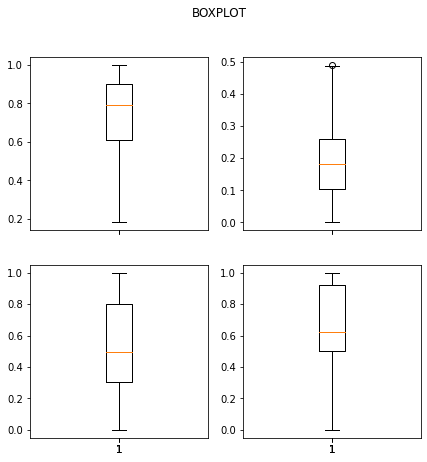

In [746]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(7,7))
figure.suptitle('BOXPLOT')

axes[0][0].boxplot(train[features[0]])
axes[0][1].boxplot(train[features[1]])
axes[1][0].boxplot(train[features[2]])
axes[1][1].boxplot(train[features[3]]);

In [747]:
# training set
Xtrain = train[features[:7]]
ytrain = train[features[-1]]

# test set
Xtest = test[features[:7]]
ytest = test[features[-1]]

###2. Train model

**Stochastic GD**

In [748]:
Xtrain = np.array(Xtrain).reshape(-1, 7)
Xtest = np.array(Xtest).reshape(-1, 7)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [749]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000000, tol=1e-3))
reg.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [750]:
y_pre_SGD = reg.predict(Xtest)

**Coding from scratch**

In [751]:
Xtrain = add_ONE(Xtrain)
Xtest = add_ONE(Xtest)

In [752]:
Xtrain = np.array(Xtrain).reshape(-1, 8)
Xtest = np.array(Xtest).reshape(-1, 8)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [753]:
# Number of training_example
N = Xtrain.shape[0]

In [754]:
 w = np.arange(Xtrain.shape[1]).reshape(-1, 1) 

In [755]:
print(Xtrain.shape)
print(ytrain.shape)
print(w.shape)

(6737, 8)
(6737, 1)
(8, 1)


In [ ]:
w, loss = GD(Xtrain, ytrain, w, 8, 0.001, 1000000)

In [ ]:
w

In [ ]:
y_pre_GD = predict_normalGD(Xtest, w)

### 3. Evaluate

In [ ]:
MSE(ytest, y_pre_GD, y_pre_SGD)

In [ ]:
r2_metric(ytest, y_pre_GD, y_pre_SGD)

In [ ]:
lossValue(loss)